In [2]:
!pip install imageio

                                              0.0/313.2 kB ? eta -:--:--
     -                                        10.2/313.2 kB ? eta -:--:--
     --                                    20.5/313.2 kB 217.9 kB/s eta 0:00:02
     ----                                  41.0/313.2 kB 393.8 kB/s eta 0:00:01
     ----------                            92.2/313.2 kB 655.4 kB/s eta 0:00:01
     ----------                            92.2/313.2 kB 655.4 kB/s eta 0:00:01
     ----------                            92.2/313.2 kB 655.4 kB/s eta 0:00:01
     ----------                            92.2/313.2 kB 655.4 kB/s eta 0:00:01
     ----------------                     143.4/313.2 kB 425.3 kB/s eta 0:00:01
     ------------------------------------ 313.2/313.2 kB 807.9 kB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

In [2]:
df = pd.read_csv('../data/gapminder_total.csv')
df

country  year  life expectancy continent  population  fertility
0      Afghanistan  1951            27.13      Asia   7839426.0       7.67
1      Afghanistan  1952            27.67      Asia   7934798.0       7.67
2      Afghanistan  1953            28.19      Asia   8038312.0       7.67
3      Afghanistan  1954            28.73      Asia   8150037.0       7.67
4      Afghanistan  1955            29.27      Asia   8270024.0       7.67
...            ...   ...              ...       ...         ...        ...
10915     Zimbabwe  2011            51.60    Africa  14255592.0       3.64
10916     Zimbabwe  2012            54.20    Africa  14565482.0       3.56
10917     Zimbabwe  2013            55.70    Africa  14898092.0       3.49
10918     Zimbabwe  2014            57.00    Africa  15245855.0       3.41
10919     Zimbabwe  2015            59.30    Africa  15602751.0       3.35

[10920 rows x 6 columns]

### First, improve your plot with the new features you learned during the encounter:

- Rotate the x-ticks by 45 degrees
- Color each point according to continent
- Annotate 2 to 4 countries
- Add grid-lines
- Adjust the opacity of the points
- Try out different plotting themes

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

#### Step 1
- Write a for loop that goes through each year

#### Step 2
- In each iteration produce a scatterplot like the one you have made in the previous challenges

#### Step 3
- Save each scatterplot to a separate file containing the year in the filename, e.g. plot_1999.png.

#### Step 4
 - After saving the plot call plt.close() to remove the plot before plotting the next year

In [3]:
def gapminder_plot(year):
    plt.figure(figsize=(8, 5))
    sns.set_style("darkgrid")
    
    # Filter the data for the current year
    df_year = df[df['year'] == year]
    
    # Creating scatter plot
    sns.scatterplot(data=df_year,
                    x='life expectancy',
                    y='fertility',
                    hue='continent',
                    size=df_year['population'] / 100000,
                    sizes=(50, 600),
                    alpha=0.8
                    ) 
    plt.xticks(rotation=45)
    plt.axis([0, 85, 0, 9.5]) #limits x-y axis values

    # Editing the legend- the handles and labels from the first 7 items
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[0:7], labels[0:7], borderaxespad=0.7, fontsize=8, bbox_to_anchor=(1.4, 1))

    # Add labels and title
    plt.title('Life Expectancy vs Fertility Rate')
    plt.ylabel('Fertility')
    plt.xlabel('Life Expectancy')

    # Add label markers for specific countries #retrieves the x and y coordinates for each country from df
    countries_to_label = ['Pakistan', 'Germany', 'China', 'United States']
    for country in countries_to_label:
        x = float(df_year.loc[df_year['country'] == country, 'life expectancy'].values[0])
        y = float(df_year.loc[df_year['country'] == country, 'fertility'].values[0])
        plt.text(x, y, country, fontsize=8, ha='center', va='center')
    
    # Add year label
    plt.text(75, 9, f'Year: {year}', fontsize=8, ha='right', va='top', 
             bbox= dict(facecolor='whitesmoke', boxstyle='round,pad=0.5'))
    
    plt.tight_layout()
    plt.savefig(f'../scatterplots/plot_{year}.png', dpi=300)
    

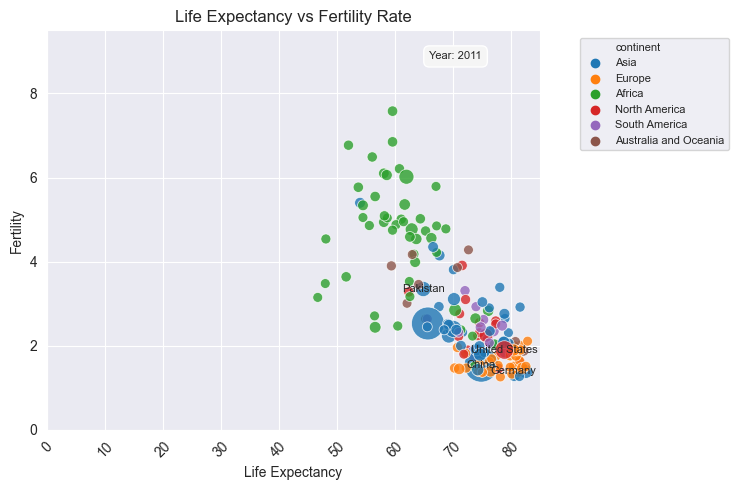

In [4]:
#for single year
gapminder_plot(2011)

In [5]:
#for all the years

for year in range(1960, 2016):
    gapminder_plot(year)
    plt.close()

#### Step 5
To generate a gif file from the individual pictures, adjust the following code example and execute it:

In [6]:
images = []

for year in range(1960, 2016):
    filename = f'../scatterplots/plot_{year}.png'
    images.append(imageio.v3.imread(filename))

output_filename = '../scatterplots/animation.gif'
imageio.mimsave(output_filename, images, duration=100)


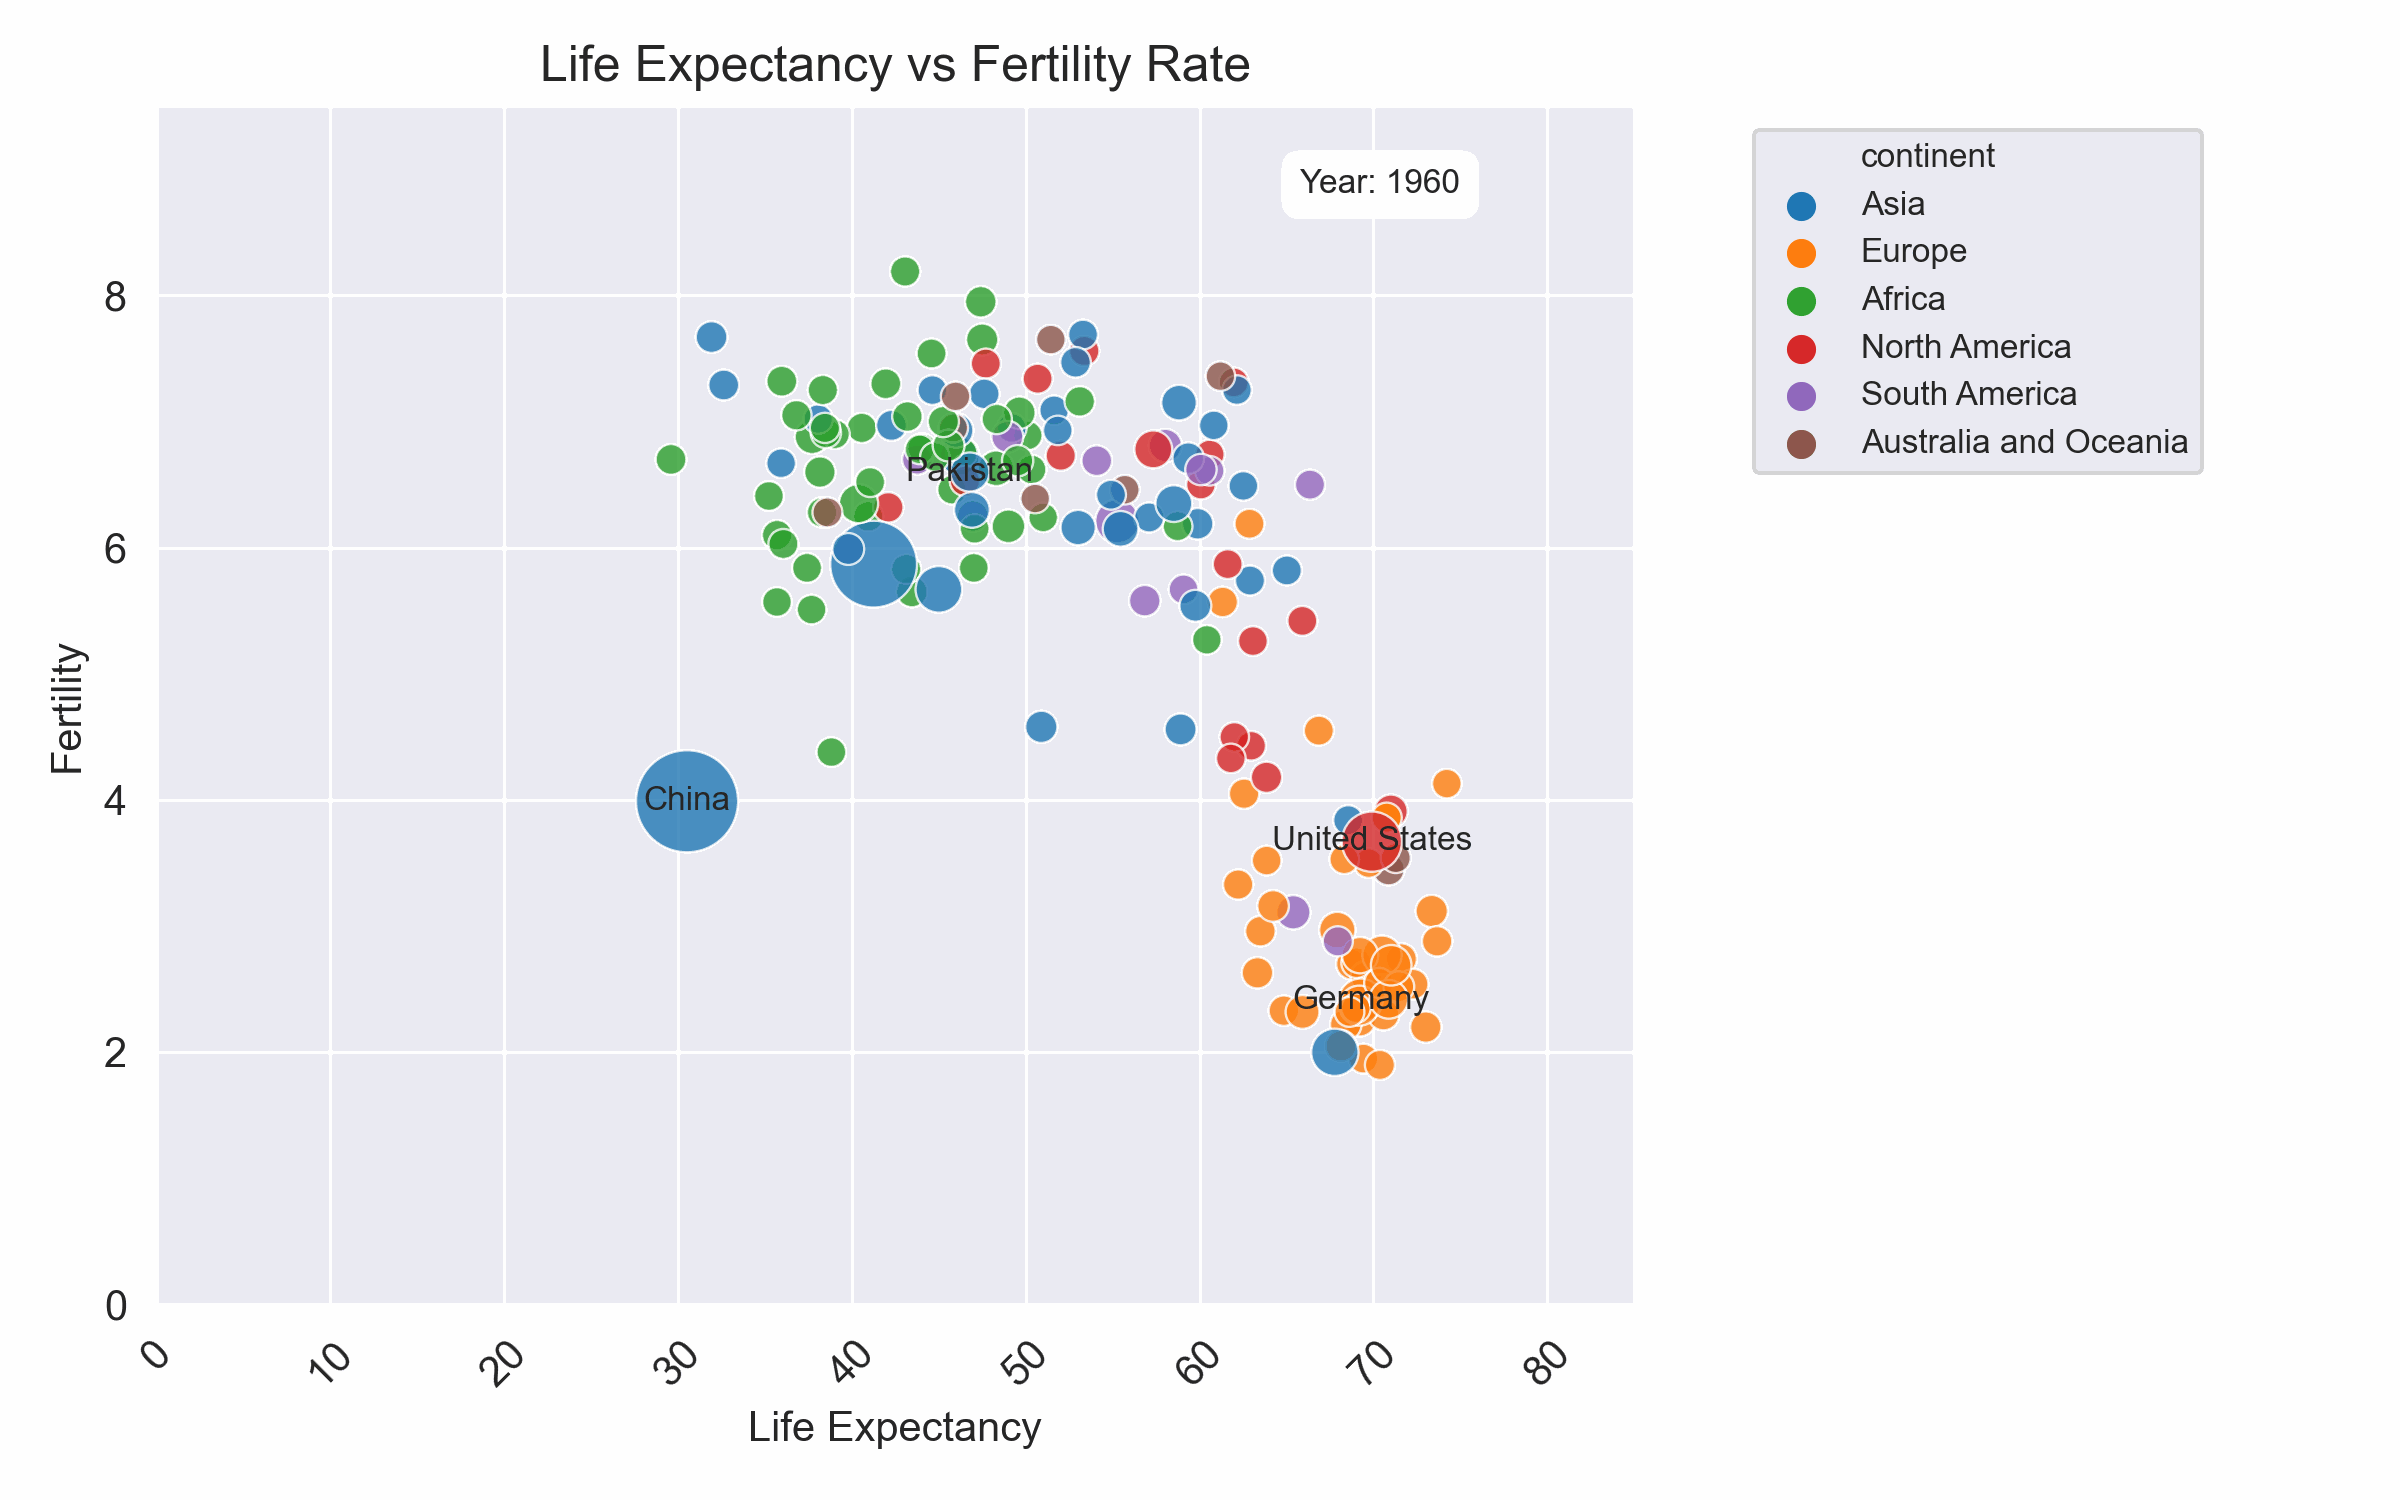

In [10]:
#display the gif
from IPython import display
display.Image("../scatterplots/animation.gif")

Countries with higher life expectancies seem to have lower fertility rates, This trend is often observed in more developed countries.